------------------------------------------------------------------------------------------
Regression model for all the columns dependent on avg_grade
                            OLS Regression Results                            
Dep. Variable:              avg_grade   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     5.546
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           2.88e-09
Time:                        19:16:45   Log-Likelihood:                -1042.2
No. Observations:                 395   AIC:                             2112.
Df Residuals:                     381   BIC:                             2168.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t     

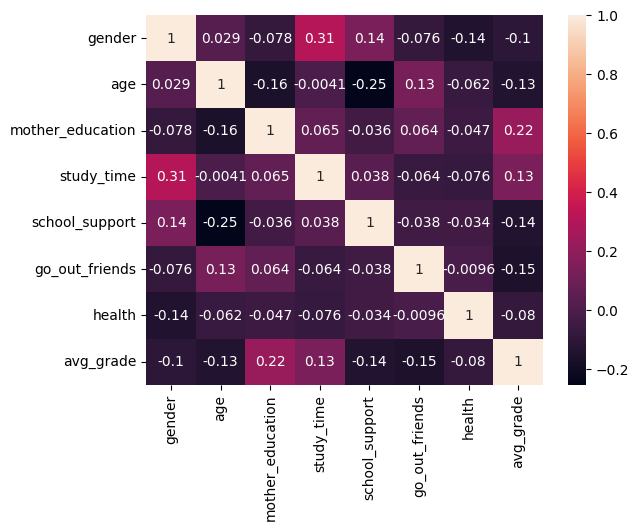

Regression model with only mother_education dependent on avg_grade
                            OLS Regression Results                            
Dep. Variable:              avg_grade   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     20.81
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           6.78e-06
Time:                        19:16:45   Log-Likelihood:                -1066.2
No. Observations:                 395   AIC:                             2136.
Df Residuals:                     393   BIC:                             2144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

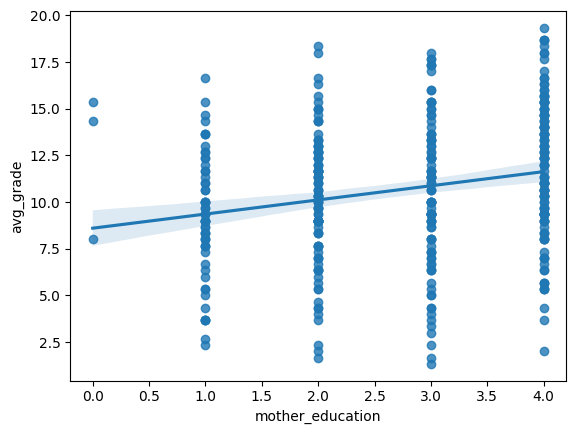

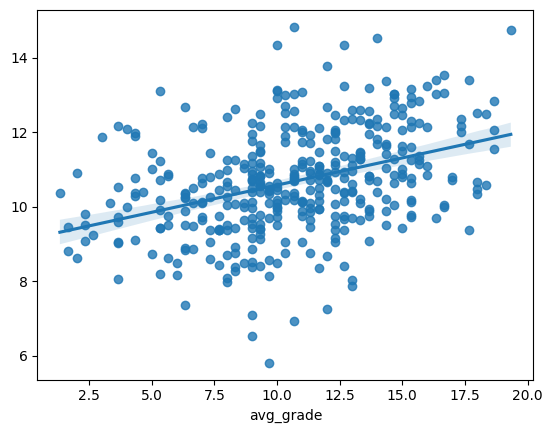

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.api as sm

# read the cvs file seperated by semicolon
df = pd.read_csv('student_performance.csv', sep=';')

# get the avarage of the grades and discard the grades columns
df['avg_grade'] = df[['Grade1', 'Grade2', 'Grade3']].mean(axis=1)

# print max of grade1 grade2 grade3 columns
# print("the max of grade1, grade2, grade3 columns")
# print(df[['Grade1', 'Grade2', 'Grade3']].max())

df = df.drop(['Grade1', 'Grade2', 'Grade3'], axis=1)

# get the correlation heatmap
# sns.heatmap(df.corr(), annot=True)
# plt.show()

print("------------------------------------------------------------------------------------------")
# regression model for all the columns dependent on avg_grade
X = df.drop(['avg_grade'], axis=1)
Y = df['avg_grade']

X = sm.add_constant(X)
model_all = sm.OLS(Y, X).fit()
print("Regression model for all the columns dependent on avg_grade")
print(model_all.summary())
print("------------------------------------------------------------------------------------------")

# remove the columns that have p-value > 0.05 one by one (alcohol_consumption first)
X = df.drop(['avg_grade', 'alcohol_consumption'], axis=1)
Y = df['avg_grade']

X = sm.add_constant(X)

model_without_alcohol = sm.OLS(Y, X).fit()
print("Regression model without alcohol_consumption dependent on avg_grade")
print(model_without_alcohol.summary())
print("------------------------------------------------------------------------------------------")

# remove the columns that have p-value > 0.05 one by one (familiar_relationship second)
X = df.drop(['avg_grade', 'alcohol_consumption', 'familiar_relationship'], axis=1)
Y = df['avg_grade']

X = sm.add_constant(X)

model_without_familiar = sm.OLS(Y, X).fit()
print("Regression model without alcohol_consumption and familiar_relationship dependent on avg_grade")
print(model_without_familiar.summary())
print("------------------------------------------------------------------------------------------")

# remove next the free_time column
X = df.drop(['avg_grade', 'alcohol_consumption', 'familiar_relationship', 'free_time'], axis=1)
Y = df['avg_grade']

X = sm.add_constant(X)

model_without_free_time = sm.OLS(Y, X).fit()
print("Regression model without alcohol_consumption, familiar_relationship and free_time dependent on avg_grade")
print(model_without_free_time.summary())
print("------------------------------------------------------------------------------------------")

# remove the father_education column
X = df.drop(['avg_grade', 'alcohol_consumption', 'familiar_relationship', 'free_time', 'father_education'], axis=1)
Y = df['avg_grade']

X = sm.add_constant(X)

model_without_father_education = sm.OLS(Y, X).fit()
print("Regression model without alcohol_consumption, familiar_relationship, free_time and father_education dependent on avg_grade")
print(model_without_father_education.summary())
print("------------------------------------------------------------------------------------------")

# travel_time column removed
X = df.drop(['avg_grade', 'alcohol_consumption', 'familiar_relationship', 'free_time', 'father_education', 'travel_time'], axis=1)
Y = df['avg_grade']

X = sm.add_constant(X)

model_without_travel_time = sm.OLS(Y, X).fit()
print("Regression model without alcohol_consumption, familiar_relationship, free_time, father_education and travel_time dependent on avg_grade")
print(model_without_travel_time.summary())
print("------------------------------------------------------------------------------------------")

#school_absences column removed
X = df.drop(['avg_grade', 'alcohol_consumption', 'familiar_relationship', 'free_time', 'father_education', 'travel_time', 'school_absences'], axis=1)
Y = df['avg_grade']

X = sm.add_constant(X)

model_without_school_absences = sm.OLS(Y, X).fit()
print("Regression model without alcohol_consumption, familiar_relationship, free_time, father_education, travel_time and school_absences dependent on avg_grade")
print(model_without_school_absences.summary()) # final model everything is significant
print("------------------------------------------------------------------------------------------")

# print the correlation heatmap of the remaining columns for the avg_grade
sns.heatmap(df.drop(['alcohol_consumption', 'familiar_relationship', 'free_time', 'father_education', 'travel_time', 'school_absences'], axis=1).corr(), annot=True)
plt.show()

## as we can see the most important columns are the mother_education with 0.22 positive correlation,
# go_out_friends with -0.15 negative correlation and study_time with 0.13 positive correlation
# school_support with -0.14 negative correlation and age with -0.13 negative correlation

# here are a few models that only use the most significant columns
X = df[['mother_education']]
Y = df['avg_grade']

X = sm.add_constant(X)

model_mother_education_only = sm.OLS(Y, X).fit()
print("Regression model with only mother_education dependent on avg_grade")
print(model_mother_education_only.summary())
print("------------------------------------------------------------------------------------------")

X = df['go_out_friends']
Y = df['avg_grade']

X = sm.add_constant(X)

model_going_out_with_friends_only = sm.OLS(Y, X).fit()
print("Regression model with only going_out_with_friends dependent on avg_grade")
print(model_going_out_with_friends_only.summary())

print("------------------------------------------------------------------------------------------")

X = df['study_time']
Y = df['avg_grade']

X = sm.add_constant(X)

model_study_time_only = sm.OLS(Y, X).fit()
print("Regression model with only study_time dependent on avg_grade")
print(model_study_time_only.summary())
print("------------------------------------------------------------------------------------------")

X = df['school_support']
Y = df['avg_grade']

X = sm.add_constant(X)

model_school_support_only = sm.OLS(Y, X).fit()
print("Regression model with only school_support dependent on avg_grade")
print(model_school_support_only.summary())
print("------------------------------------------------------------------------------------------")

X = df['age']
Y = df['avg_grade']

X = sm.add_constant(X)

model_age_only = sm.OLS(Y, X).fit()
print("Regression model with only age dependent on avg_grade")
print(model_age_only.summary())

#plot the most significant column mother_education using seaborn put the regression line
sns.regplot(x='mother_education', y='avg_grade', data=df)
plt.show()

#plot the regression line of using model_without_school_absences best model
X = df.drop(['avg_grade', 'alcohol_consumption', 'familiar_relationship', 'free_time', 'father_education', 'travel_time', 'school_absences'], axis=1)
X = sm.add_constant(X)
sns.regplot(y=model_without_school_absences.predict(X), x=df['avg_grade'])
plt.show()

### Based on the regression results, the mathematical formula for the dependent variable avg_grade (Y) in terms of the independent variables of the best model is given by the following regression equation:

```
Y(avg_grade) = β0 + β1 * gender + β2 * age + β3 * mother_education + β4 * study_time +
β5 * school_support + β6 * go_out_friends + β7 * health
```

## Where:
```
    β0 =   16.9792 (constant term)
    β1 = − 0.9843  (coefficient for gender)
    β2 = − 0.3654  (coefficient for age)
    β3 =   0.6190  (coefficient for mother_education)
    β4 =   0.6683  (coefficient for study_time)
    β5 = − 1.7537  (coefficient for school_support)
    β6 = − 0.5232  (coefficient for go_out_friends)
    β7 = − 0.2505  (coefficient for health)
```

#### Model has 0.13 R-squared value, which means that 13% of the variance in the dependent variable (avg_grade) can be explained by it.

### Substituting the coefficients from the regression output:

```
avg_grade=  16.9792 − 0.9843 * gender − 0.3654 * age + 0.6190 * mother_education
+0.6683 * study_time − 1.7537 * school_support − 0.5232 * go_out_friends
− 0.2505 * health
```

## the following variables are not significant in predicting the avg_grade
**alcohol_consumption**, **familiar_relationship**, **free_time**, **father_education**, **travel_time** and **school_absences**
the former being the least significant

Final thoughts: the model is pretty bad it has very weak correlation with the dependent variable, the model is not very good at predicting the avg_grade

FYI: the model and the Y equations is not entirely accurate because it does not account for dummy variables. also we treat this a complete dataset not a sample so no confidence intervals are calculated